In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

In [3]:
rnaseq_file = '../Data/raw_data/41467_2019_13483_MOESM4_ESM.xlsx'

In [4]:
metadata_df = pd.read_excel(rnaseq_file, sheet_name='Metadata')
print(metadata_df.shape)
metadata_df = metadata_df[metadata_df['Growth Rate (1/hr)'].isnull() == False]
print(metadata_df.shape)
metadata_df = metadata_df[metadata_df['Growth Rate (1/hr)'] > 0.0]
print(metadata_df.shape)
metadata_df = metadata_df[metadata_df['Alignment'] > 80]
print(metadata_df.shape)

(278, 26)
(195, 26)
(179, 26)
(173, 26)


In [5]:
expression_df = pd.read_excel(rnaseq_file, sheet_name='Expression Data', index_col=0)
print(expression_df.shape)
expression_df = expression_df[metadata_df['Sample ID']]
print(expression_df.shape)

(3923, 278)
(3923, 173)


In [ ]:
assert list(metadata_df['Sample ID']) == list(expression_df.columns)

In [ ]:
expression_df = expression_df / expression_df.sum()

In [ ]:
tempy = []
for index in expression_df.index:
    rho, p = stats.spearmanr(expression_df.loc[index], metadata_df['Growth Rate (1/hr)'])
    tempy.append((index, rho, p))
tempy.sort(key=lambda x: x[1])

In [ ]:
tempy

In [ ]:
a = metadata_df['Growth Rate (1/hr)']
b = expression_df.sum()

fig, ax = plt.subplots()
ax.scatter(a,b)

In [ ]:
metadata_df['Growth Rate (1/hr)'].hist()

In [ ]:
tempy = []
for column in expression_df.columns:
    rho, p = stats.spearmanr(expression_df[expression_df.columns[0]], expression_df[column])
    tempy.append((column, rho, p))
tempy.sort(key=lambda x: x[1])

In [ ]:
tempy

In [12]:
other_df = pd.read_csv('../Data/ecoli_info/temp_ecoli_master_table.tsv', sep='\t', index_col=0)
other_df = other_df[other_df['CAI'].isnull()==False]
print(other_df.shape)
# other_df = pd.read_csv('../Phage_translation/Data/562_associated_data/ecoli.combined.tsv', sep='\t', index_col=7)

(4310, 7)


In [13]:
other_df

,gene,start_loc,stop_loc,strand,cds_seq,us_seq,CAI
locus_tag,,,,,,,
b0001,thrL,189,255,+,ATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCA...,CAGATAAAAATTACAGAGTACACAACATCC,0.617266
b0002,thrA,336,2799,+,ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAAC...,TTTTCGACCAAAGGTAACGAGGTAACAACC,0.353246
b0003,thrB,2800,3733,+,ATGGTTAAAGTTTATGCCCCGGCTTCCAGTGCCAATATGAGCGTCG...,GTACCCTCTCATGGAAGTTAGGAGTCTGAC,0.357812
b0004,thrC,3733,5020,+,ATGAAACTCTACAATCTGAAAGATCACAACGAGCAGGTCAGCTTTG...,ACGGCGGGCGCACGAGTACTGGAAAACTAA,0.394675
b0005,yaaX,5233,5530,+,GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGG...,CATAACGGGCAATGATAAAAGGAGTAACCT,0.374371
...,...,...,...,...,...,...,...
b4399,creC,4636695,4638120,+,ATGCGTATCGGCATGCGGTTGTTGCTGGGCTATTTTTTACTGGTGG...,CGGCATGGGATATAGCCTGAGGGGCCTGTA,0.293537
b4400,creD,4638177,4639530,+,ATGTTGAAATCCCCCCTGTTCTGGAAAATGACTAGCCTGTTTGGTG...,TATCCTGCTGCCATTGCAAAGGAGAAGACT,0.288635
b4401,arcA,4639589,4640306,-,ATGCAGACCCCGCACATTCTTATCGTTGAAGACGAGTTGGTAACAC...,TCGATTTAGTTGGCAATTTAGGTAGCAAAC,0.530773


In [14]:
print(expression_df.shape)
expression_df = expression_df[expression_df.index.isin(other_df.index)]
print(expression_df.shape)
other_df = other_df[other_df.index.isin(expression_df.index)]
print(other_df.shape)

(3923, 173)
(3859, 173)
(3859, 7)


In [15]:
expression_df = expression_df.sort_index()
other_df = other_df.sort_index()

In [18]:
tempy = []
listy_a = []
listy_b = []
for column in expression_df.columns:
#     a, b, c, d, e = stats.linregress(other_df['CAI'], expression_df[column])
#     listy_a.append(c)
#     listy_b.append(metadata_df[metadata_df['Sample ID']==column].iloc[0]['Growth Rate (1/hr)'])
#     tempy.append((column, rho, p))
    rho, p = stats.spearmanr(other_df['CAI'], expression_df[column])
    listy_a.append(rho)
    listy_b.append(metadata_df[metadata_df['Sample ID']==column].iloc[0]['Growth Rate (1/hr)'])
    tempy.append((column, rho, p))
tempy.sort(key=lambda x: x[1])

SpearmanrResult(correlation=0.4119985099319515, pvalue=1.782679623368587e-08)


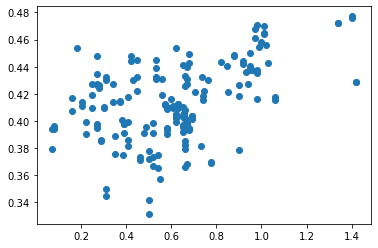

In [19]:
fig, ax = plt.subplots()
ax.scatter(listy_b, listy_a)
print(stats.spearmanr(listy_b, listy_a))

In [20]:
tempy

[('fps__fps_serB_ale4__2', 0.33146369607745396, 1.2885775488479362e-99),
 ('fps__fps_serB_ale4__1', 0.3420018827900485, 2.4663472312302756e-106),
 ('ica__cytd_rib__2', 0.3444408755860476, 6.3024416087092785e-108),
 ('ica__cytd_rib__1', 0.3496102963395999, 2.380471023175806e-111),
 ('ssw__wt_xyl__1', 0.3575035445904968, 1.0578438521556207e-116),
 ('fps__fps_thrA_ale1__1', 0.3651268816718592, 5.11143160252301e-122),
 ('ytf__delyiaJ__2', 0.36627391631209333, 7.871608573494893e-123),
 ('fps__fps_thrA_ale2__1', 0.3664288879239551, 6.109945076938548e-123),
 ('ytf__delybiH__2', 0.3679308406920579, 5.20634069765807e-124),
 ('ica__ade_glc__2', 0.3691498275928744, 6.987283366871812e-125),
 ('ica__ade_glc__1', 0.36973015222399813, 2.6775510982047237e-125),
 ('efeU__menFentCubiC_ale37__1', 0.3713691338055837, 1.7643870735580306e-126),
 ('fps__fps_serB_ale1__1', 0.3718005202422033, 8.6014027572368e-127),
 ('efeU__menFentCubiC_ale37__2', 0.37306425596457266, 1.0417241138208416e-127),
 ('fps__fps_thr

In [ ]:
other_df.columns

In [ ]:
expression_df

In [21]:
listy = []
for index in expression_df.index:
    rho, p = stats.spearmanr(expression_df.loc[index], metadata_df['Growth Rate (1/hr)'])
    listy.append(rho)
other_df['hunch'] = listy

SpearmanrResult(correlation=0.36392238574567204, pvalue=3.6153357810994047e-121)


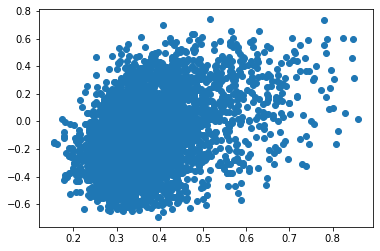

In [22]:
fig, ax = plt.subplots()
ax.scatter(other_df['CAI'], other_df['hunch'])
print(stats.spearmanr(other_df['CAI'], other_df['hunch']))

In [ ]:
fig, ax = plt.subplots()
ax.scatter(other_df['Start_accessibility'], other_df['hunch'])
print(stats.spearmanr(other_df['Start_accessibility'], other_df['hunch']))

In [ ]:
fig, ax = plt.subplots()
ax.scatter(other_df['sec_struct'], other_df['hunch'])
print(stats.spearmanr(other_df['sec_struct'], other_df['hunch']))

In [ ]:
fig, ax = plt.subplots()
ax.scatter(other_df['aSD_binding'], other_df['hunch'])
print(stats.spearmanr(other_df['aSD_binding'], other_df['hunch']))